<a href="https://colab.research.google.com/github/nihal-rao/Integrated-Real-time-2D-hand-pose/blob/master/Evaluation_LSMV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install detectron2

In [ ]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/torch1.4/detectron2-0.1.1%2Bcu100-cp36-cp36m-linux_x86_64.whl

In [ ]:
import shutil
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/fpn_keypoint.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/backbone/fpn_keypoint.py" )
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/retinanet_keypoint_only.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/meta_arch/retinanet_keypoint.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/roi_head_mod_final.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/roi_head_mod.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/roi_head_init.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/__init__.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/backbone_init.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/backbone/__init__.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/meta_arch_init.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/meta_arch/__init__.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/train_loop.py","/usr/local/lib/python3.6/dist-packages/detectron2/engine/train_loop.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/det_checkpoint.py","/usr/local/lib/python3.6/dist-packages/detectron2/checkpoint/detection_checkpoint.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/build.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/meta_arch/build.py")
shutil.copyfile("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/keypoint_head_xy.py","/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/keypoint_head.py")

In [ ]:
import numpy as np
import os
import cv2
import random
from google.colab.patches import cv2_imshow
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog , DatasetMapper

##Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
from detectron2.data.datasets import register_coco_instances
import os
import numpy as np
import json
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog

register_coco_instances("LSMV_train", {}, "/content/drive/My Drive/LSMV_train_correct_21.json", "/content/drive/My Drive/LSMV_imgs")
register_coco_instances("LSMV_test", {}, "/content/drive/My Drive/LSMV_test_correct_21.json", "/content/drive/My Drive/LSMV_imgs")

train_metadata = MetadataCatalog.get("LSMV_train")
val_metadata = MetadataCatalog.get("LSMV_test")

In [ ]:
from detectron2.utils.visualizer import Visualizer

dataset_dicts = DatasetCatalog.get("LSMV_test")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=val_metadata, scale=1.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])
    print(d["file_name"])

In [ ]:
val_metadata.keypoint_flip_map=[]
val_metadata.keypoint_names=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
val_metadata.keypoint_connection_rules=[("0","2",(255,0,0)),("2",'3',(255,0,0)),('1','0',(255,0,0)),('4','6',(255,255,0)),('6','7',(255,255,0)),('4','5',(255,255,0)),('12','14',(0,255,0)),('14','15',(0,255,0)),('12','13',(0,255,0)),('8','10',(0,0,255)),('10','11',(0,0,255)),('8','9',(0,0,255)),('16','18',(0,0,0)),('18','19',(0,0,0)),('16','17',(0,0,0)),('20','1',(0,255,255)),('20','5',(0,255,255)),('20','13',(0,255,255)),('20','9',(0,255,255)),('20','17',(0,255,255))]

In [ ]:
train_metadata.keypoint_flip_map=[]
train_metadata.keypoint_names=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20"]
train_metadata.keypoint_connection_rules=[("0","2",(255,0,0)),("2",'3',(255,0,0)),('1','0',(255,0,0)),('4','6',(255,255,0)),('6','7',(255,255,0)),('4','5',(255,255,0)),('12','14',(0,255,0)),('14','15',(0,255,0)),('12','13',(0,255,0)),('8','10',(0,0,255)),('10','11',(0,0,255)),('8','9',(0,0,255)),('16','18',(0,0,0)),('18','19',(0,0,0)),('16','17',(0,0,0)),('20','1',(0,255,255)),('20','5',(0,255,255)),('20','13',(0,255,255)),('20','9',(0,255,255)),('20','17',(0,255,255))]

## Evaluation of trained model

In [ ]:
"""
Creating predictor from trained model
"""
cfg = get_cfg()
cfg.merge_from_file("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/KP_RN_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("LSMV_train",)
cfg.DATASETS.VAL = ()
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.MODEL.DEVICE = "cuda"

cfg.SOLVER.BASE_LR = 0.0001 
cfg.VIS_PERIOD = 0
cfg.MODEL.ROI_HEADS.PROPOSAL_APPEND_GT = False
cfg.INPUT.MIN_SIZE_TRAIN = (800,)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 2
cfg.MODEL.ROI_HEADS.POSITIVE_FRACTION = 1.0
cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[x, x * 2**(1.0/3), x * 2**(2.0/3) ] for x in [64, 128, 256, 512 ]] 
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

cfg.MODEL.WEIGHTS = '/content/drive/My Drive/LSMV_KPRetinaNet_L1_loss_16k/model_final.pth'
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.05
cfg.DATASETS.TEST = ("LSMV_test", )
predictor = DefaultPredictor(cfg)

[07/22 09:55:51 d2.data.datasets.coco]: Loaded 16552 images in COCO format from /content/drive/My Drive/LSMV_test_correct_21.json


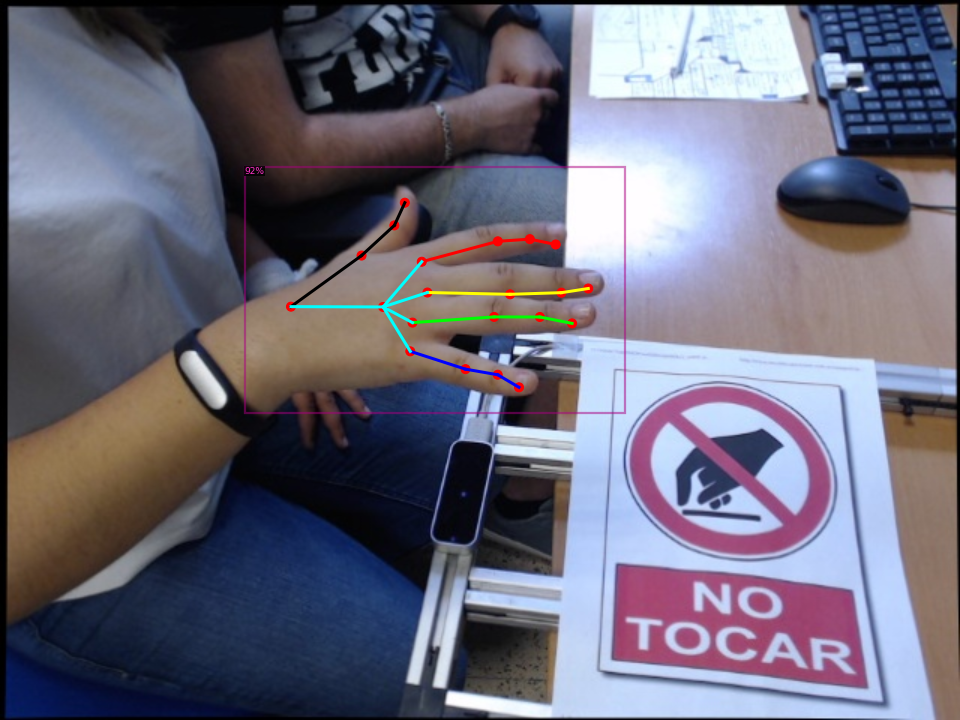

/content/drive/My Drive/LSMV_imgs/data_21/1378_webcam_2.jpg


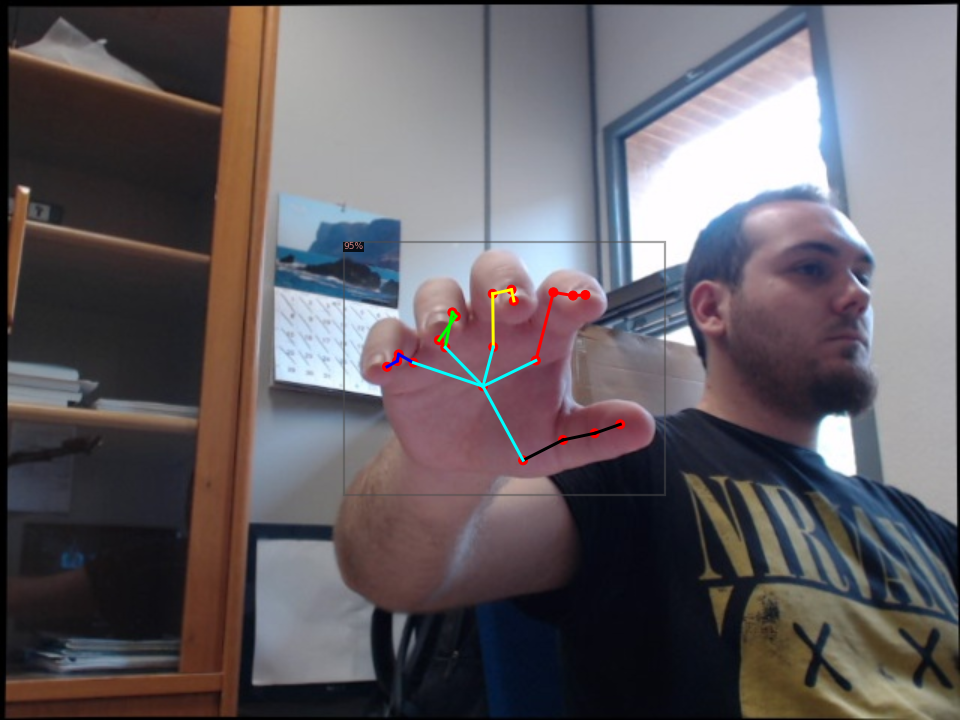

/content/drive/My Drive/LSMV_imgs/data_1/335_webcam_4.jpg


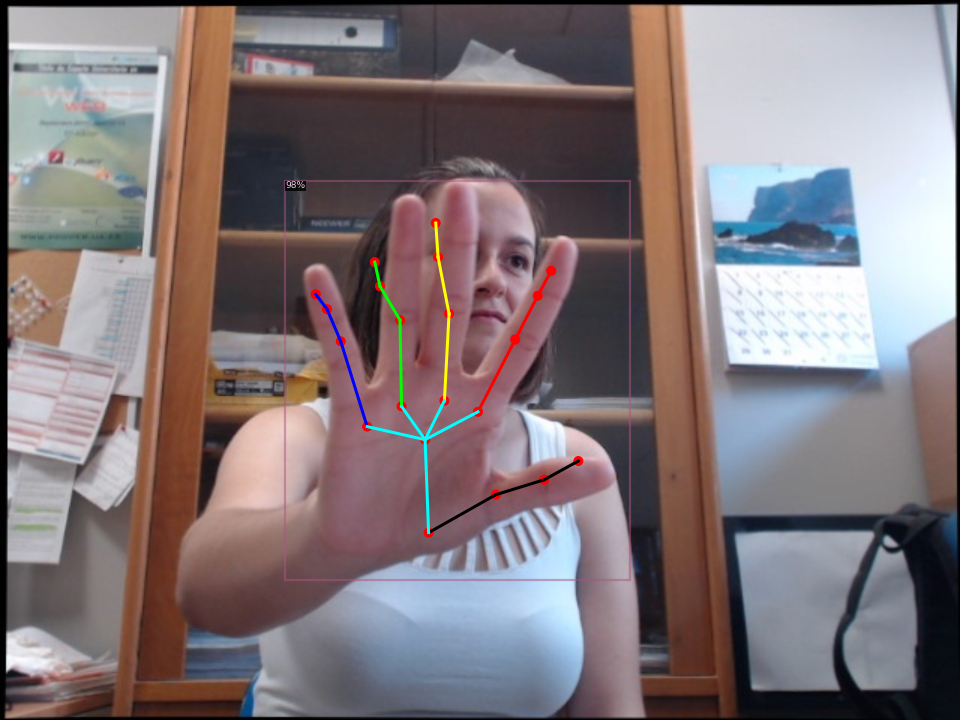

/content/drive/My Drive/LSMV_imgs/data_19/967_webcam_4.jpg


In [ ]:
"""
Some predictions on test images
"""
dataset_dicts = DatasetCatalog.get("LSMV_test")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)
    v = Visualizer(img[:, :, ::-1],
                   metadata=val_metadata, 
                   scale=1.5, 
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])
    print(d["file_name"])

In [ ]:
"""
cfg2 is a dummy config used to easily read the ground truth keypoint positions for comparison with predicted keypoints
"""
cfg2 = get_cfg()
cfg2.merge_from_file("/content/drive/My Drive/KP_RN_Configs/KP_RN_Configs/KP_RN_FPN_3x.yaml")
cfg2.DATASETS.TRAIN = ("LSMV_test",)
cfg2.DATASETS.VAL = ()
cfg2.DATASETS.TEST = ()
cfg2.DATALOADER.NUM_WORKERS = 2
cfg2.SOLVER.IMS_PER_BATCH = 1
cfg2.MODEL.DEVICE = "cuda"
cfg2.MODEL.WEIGHTS = '/content/drive/My Drive/KPRetinaNet_L1_loss_LSMV_8k/model_final.pth'
cfg2.SOLVER.BASE_LR = 0.0001 
cfg2.VIS_PERIOD = 0
cfg2.MODEL.ROI_HEADS.PROPOSAL_APPEND_GT = False
cfg2.INPUT.MIN_SIZE_TRAIN = (800,)
cfg2.INPUT.MIN_SIZE_TEST = (800,)
cfg2.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 2
cfg2.MODEL.ROI_HEADS.POSITIVE_FRACTION = 1.0
cfg2.MODEL.ANCHOR_GENERATOR.SIZES = [[x, x * 2**(1.0/3), x * 2**(2.0/3) ] for x in [64, 128, 256, 512 ]]
cfg2.INPUT.MIN_SIZE_TRAIN = 0

In [ ]:
"""
Used to calculate EPE
"""
map = DatasetMapper(cfg2)
err_list = []
count = 0
dataset_dicts = DatasetCatalog.get("LSMV_test")
for i in range(len(dataset_dicts)):
  d = dataset_dicts[i]
  img = cv2.imread(d["file_name"])
  outputs = predictor(img)
  """
  print(img.shape)
  v = Visualizer(img[:, :, ::-1],
                   metadata=val_metadata, 
                   scale=1.0, 
  )
  v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(v.get_image()[:, :, ::-1])
  """
  gt_boxes = map(d)['instances'].gt_boxes.tensor.cuda()
  pred_boxes = outputs['instances'].pred_boxes.tensor
  if(len(map(d)['instances']) == len(outputs["instances"])):
    for i in range(len(map(d)['instances'])):
      ind=0
      norm_min = float('inf')
      for j in range(len(map(d)['instances'])):
        norm = torch.dist(gt_boxes[i],pred_boxes[j],p=1)
        if norm < norm_min:
          norm_min = norm
          ind = j
      gt_kps = map(d)['instances'].gt_keypoints.tensor[i].cuda()
      pred_kps = outputs['instances'].pred_keypoints[ind]
      error = torch.mean(torch.pow(torch.sum((gt_kps[:,:2]-pred_kps[:,:2])**2,dim=-1),.5))
      err_list.append(error.cpu().detach().numpy())

In [ ]:
print(sum(err_list)/len(err_list))#EPE

12.554886220239567
